In [ ]:
## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.metrics import accuracy_score,confusion_matrix

In [ ]:
df=pd.read_csv('Dataset.csv',encoding='unicode_escape')
# Reading the dataset

## Data Understanding

In [ ]:
df.head()
# Loading the dataset

,City,Date,Area,SPM,NO,NO2,NOx,CO,SO2,RSPM,AQI,AQI_Bucket
0,Ahmedabad,01-03-2023,"Residential, Rural and other Areas",88.50,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,02-03-2023,Industrial Area,84.47,0.97,15.69,16.46,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,03-03-2023,"Residential, Rural and other Areas",73.54,17.40,19.30,29.70,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,04-03-2023,"Residential, Rural and other Areas",53.89,1.70,18.48,17.97,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,05-03-2023,Industrial Area,60.08,22.10,21.42,37.76,22.10,39.33,39.31,NaN,NaN


In [ ]:
df.shape
# As we can see that there are 4,35,742 rows and 13 columns in the dataset

(6638, 12)

In [ ]:
df.info()
# Checking the over all information on the dataset.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6638 entries, 0 to 6637
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        4124 non-null   object 
 1   Date        4124 non-null   object 
 2   Area        5566 non-null   object 
 3   SPM         3035 non-null   float64
 4   NO          4116 non-null   float64
 5   NO2         4062 non-null   float64
 6   NOx         4025 non-null   float64
 7   CO          4075 non-null   float64
 8   SO2         4105 non-null   float64
 9   RSPM        3969 non-null   float64
 10  AQI         3965 non-null   float64
 11  AQI_Bucket  3965 non-null   object 
dtypes: float64(8), object(4)
memory usage: 622.4+ KB


In [ ]:
df.isnull().sum()
# There are a lot of missing values present in the dataset

,0
City,2514
Date,2514
Area,1072
SPM,3603
NO,2522
NO2,2576
NOx,2613
CO,2563
SO2,2533
RSPM,2669


In [ ]:
df.describe()
# Checking the descriptive stats of the numeric values present in the data like mean, standard deviation, min values and max value present in the data

,SPM,NO,NO2,NOx,CO,SO2,RSPM,AQI
count,3035.000000,4116.000000,4062.000000,4025.000000,4075.000000,4105.000000,3969.000000,3965.000000
mean,56.770567,16.338219,22.194833,28.270865,2.171971,14.144911,33.120431,135.140479
std,63.359521,22.220319,17.977010,26.950828,5.136664,12.725298,19.753577,98.640106
min,3.400000,0.060000,0.010000,0.000000,0.000000,0.520000,0.020000,24.000000
25%,23.665000,3.477500,10.112500,9.690000,0.550000,6.970000,20.400000,72.000000
50%,42.540000,8.330000,16.820000,19.320000,1.000000,10.650000,29.760000,104.000000
75%,69.605000,17.312500,28.785000,37.680000,1.580000,16.530000,42.670000,169.000000
max,917.770000,270.090000,140.170000,218.540000,132.070000,142.360000,159.180000,1247.000000


In [ ]:
df.nunique()
# These are all the unique values present in the dataframe

,0
City,23
Date,945
Area,6
SPM,2604
NO,2245
NO2,2657
NOx,2819
CO,710
SO2,2085
RSPM,2862


In [ ]:
df.columns
# These are all the columns present in the dataset.

Index(['City', 'Date', 'Area', 'SPM', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'RSPM',
       'AQI', 'AQI_Bucket'],
      dtype='object')

stn_code (station code)
sampling_date (date of sample collection)
state (Indian State)
location (location of sample collection)
agency
type (type of area)
so2 (sulphur dioxide concentration)
no2 (nitrogen dioxide concentration)
rspm (respirable suspended particualte matter concentration)
spm (suspended particulate matter)
location_monitoring_station
pm2_5 (particulate matter 2.5)
date (date)

## Data Visualization

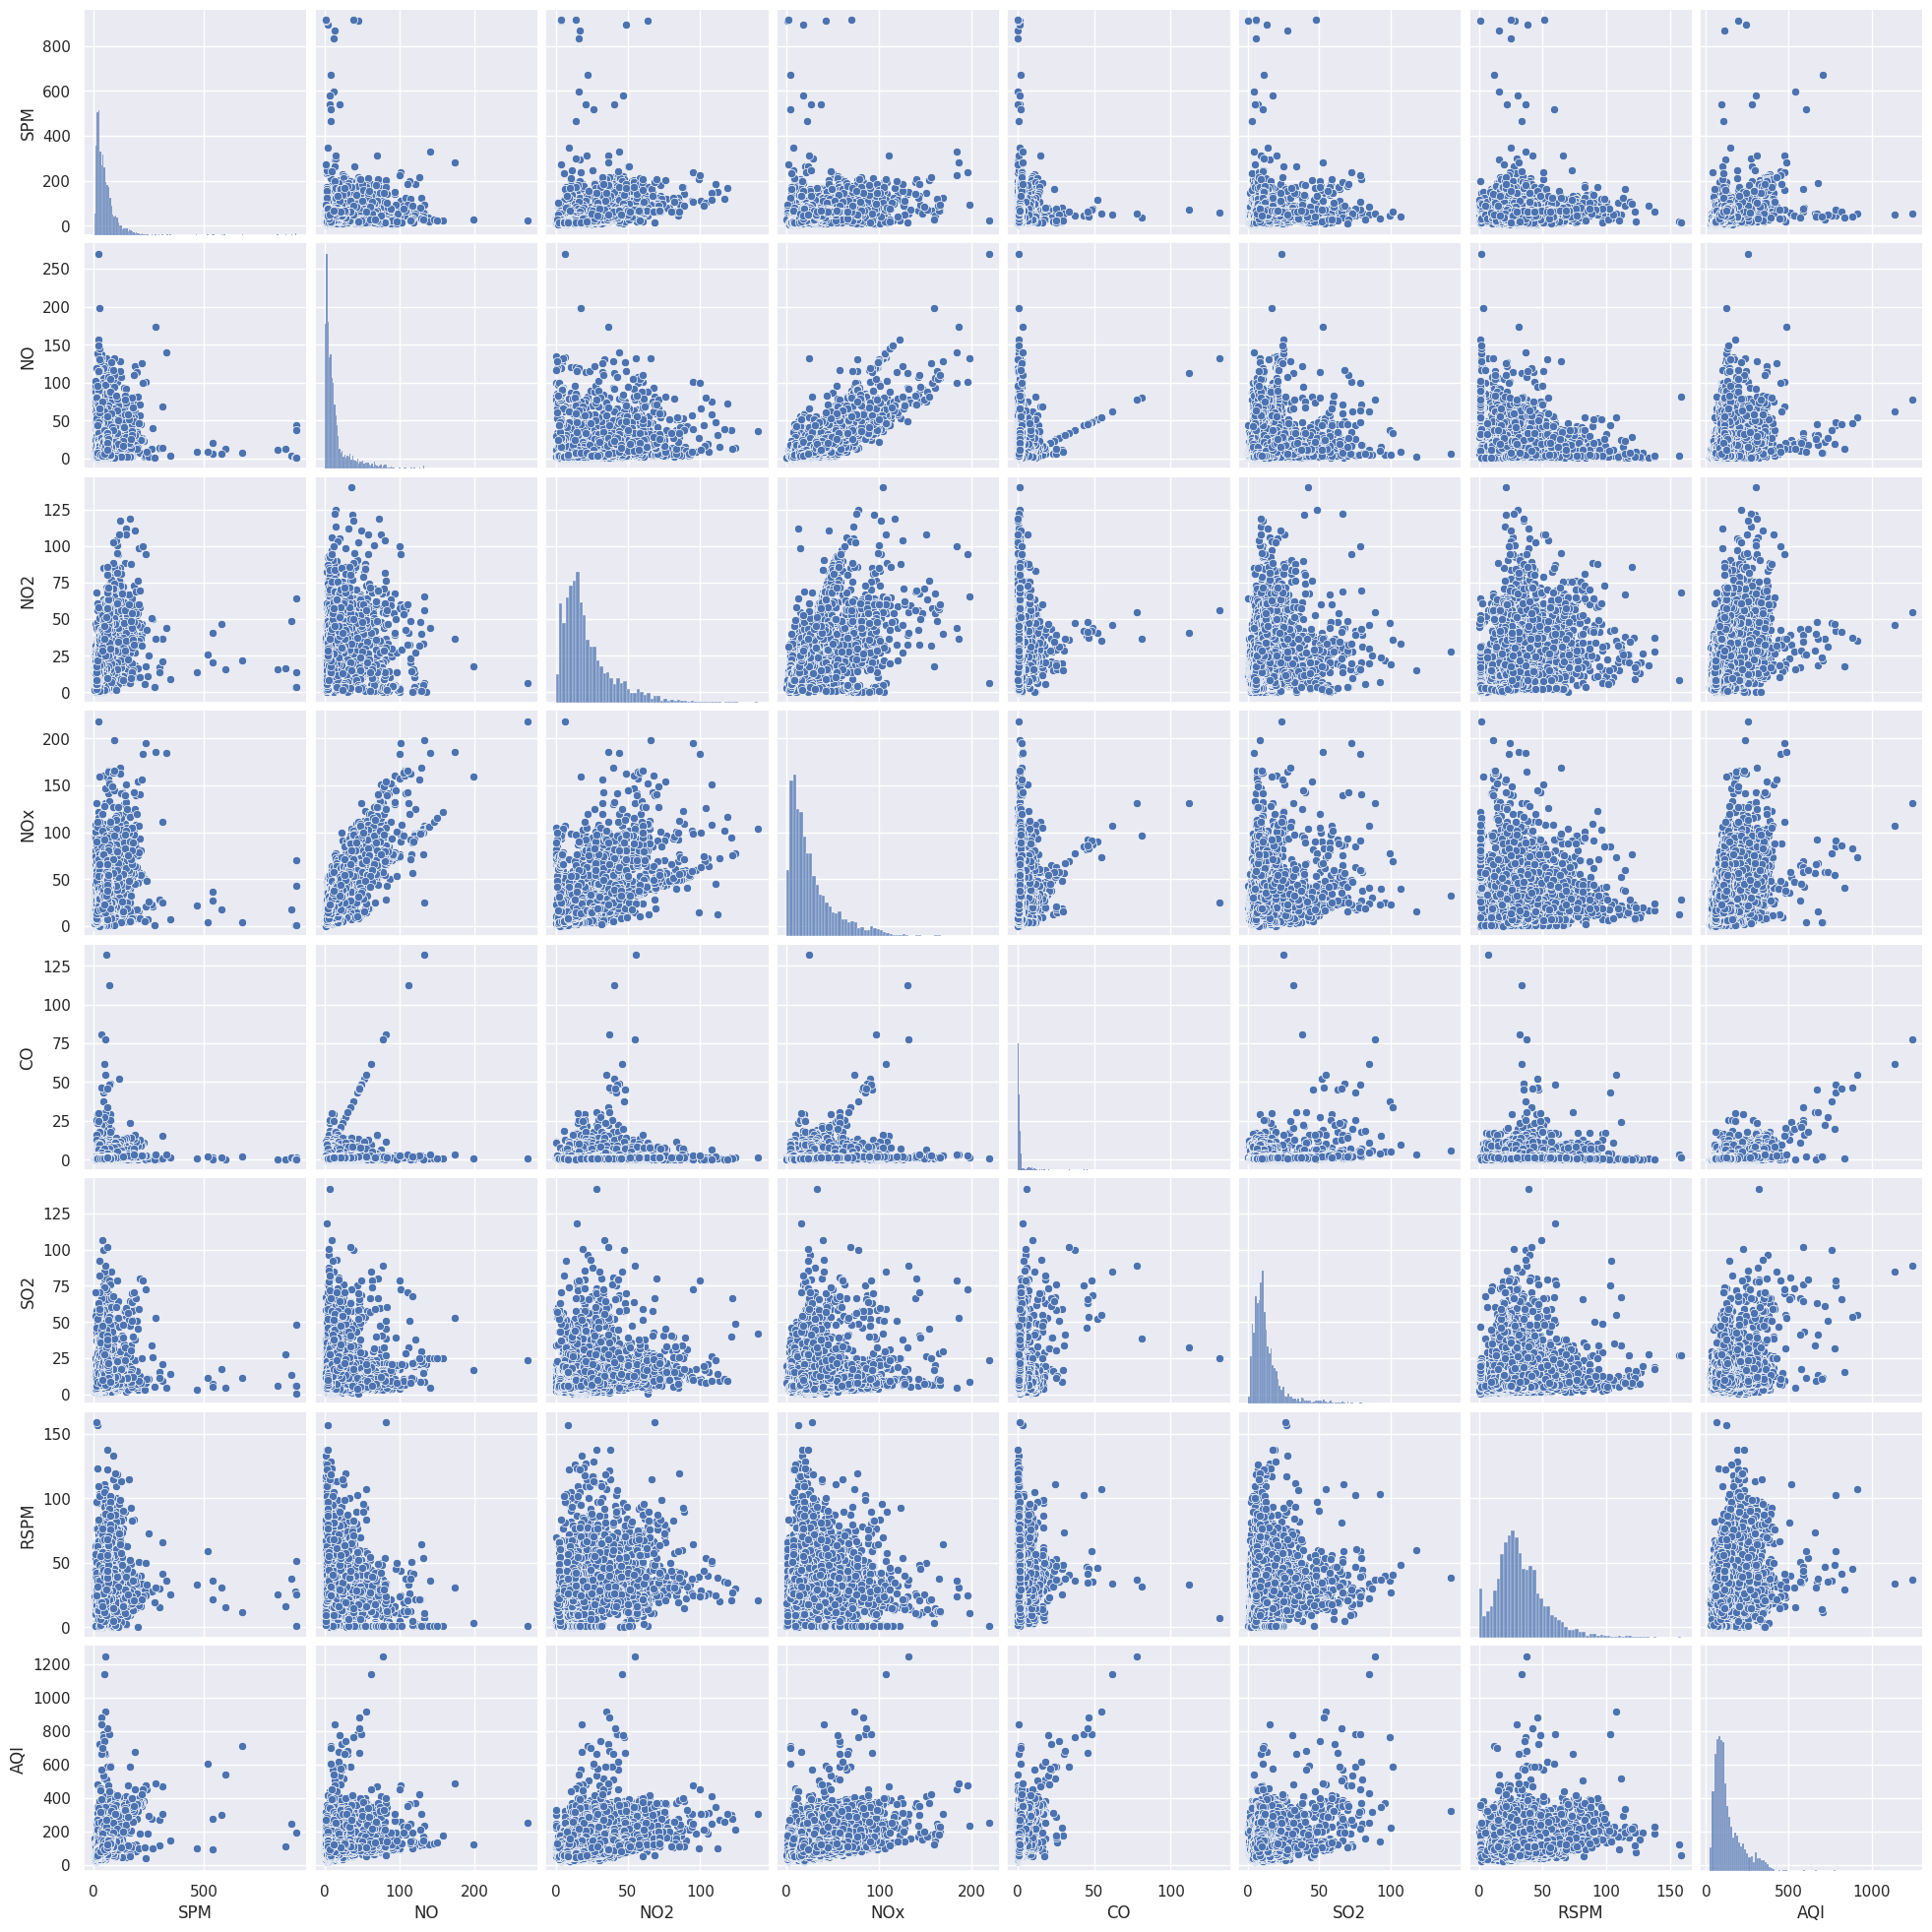

In [ ]:
sns.pairplot(data=df)

In [ ]:
df['City'].value_counts()
# Viewing the count of values present in the state column

,count
City,
Amaravati,896
Ahmedabad,240
Mumbai,170
Lucknow,159
Patna,158
Guwahati,155
Delhi,151
Jaipur,150
Thiruvananthapuram,149


[]

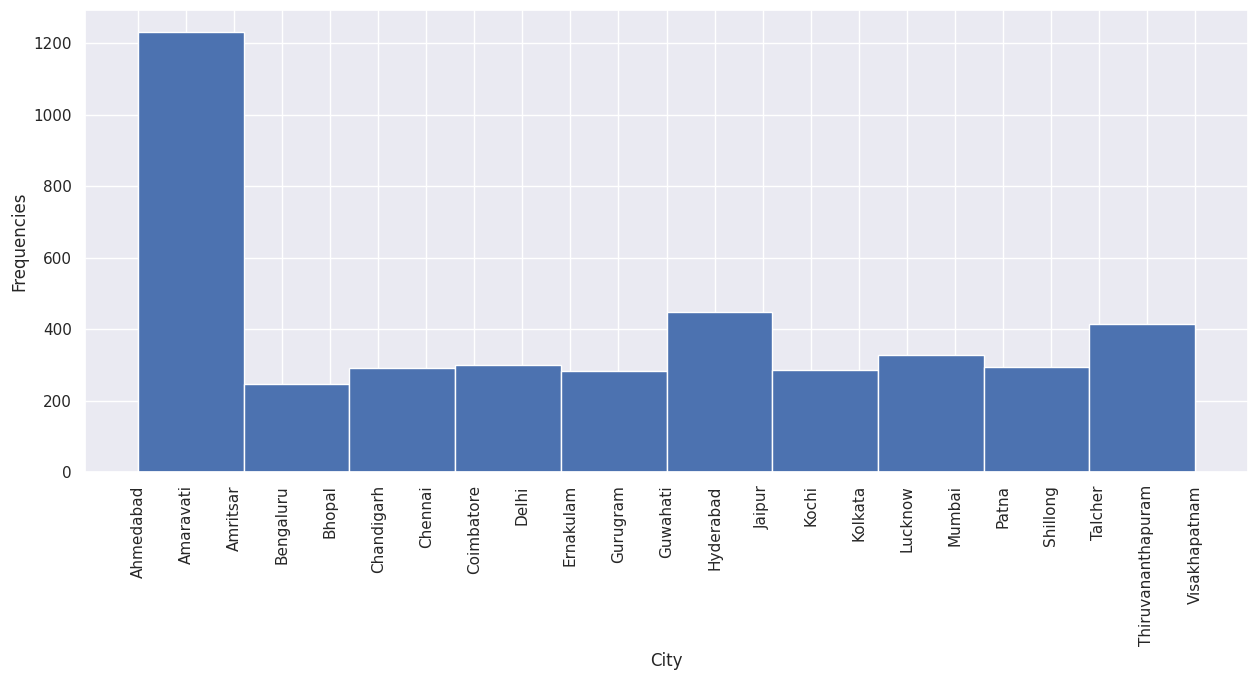

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.City.hist()
plt.xlabel('City')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of states present in the dataset.

In [ ]:
df['Area'].value_counts()
# Viewing the count of values present in the type column

,count
Area,
Residential and others,2831
Industrial Areas,1234
Sensitive Areas,629
"Residential, Rural and other Areas",577
Industrial Area,225
Sensitive Area,70


[]

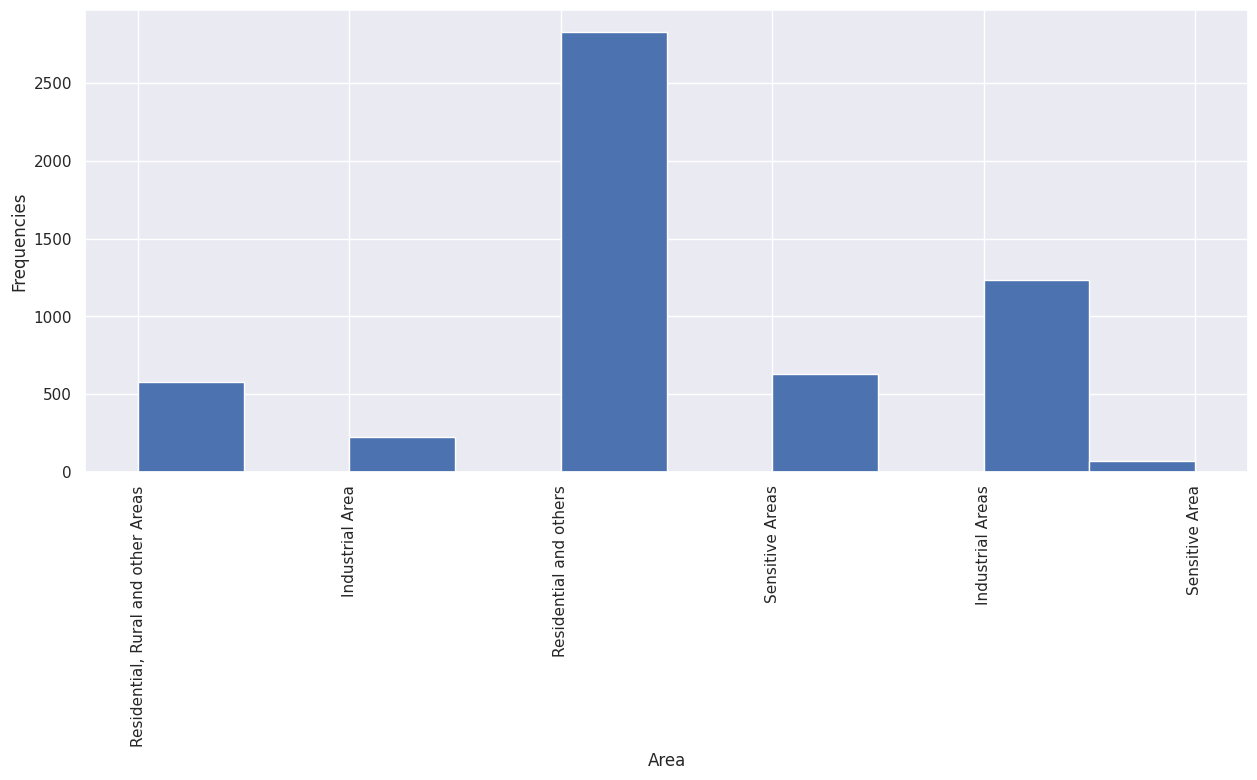

In [ ]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=90)
df.Area.hist()
plt.xlabel('Area')
plt.ylabel('Frequencies')
plt.plot()
# The visualization shows us the count of Types present in the dataset.

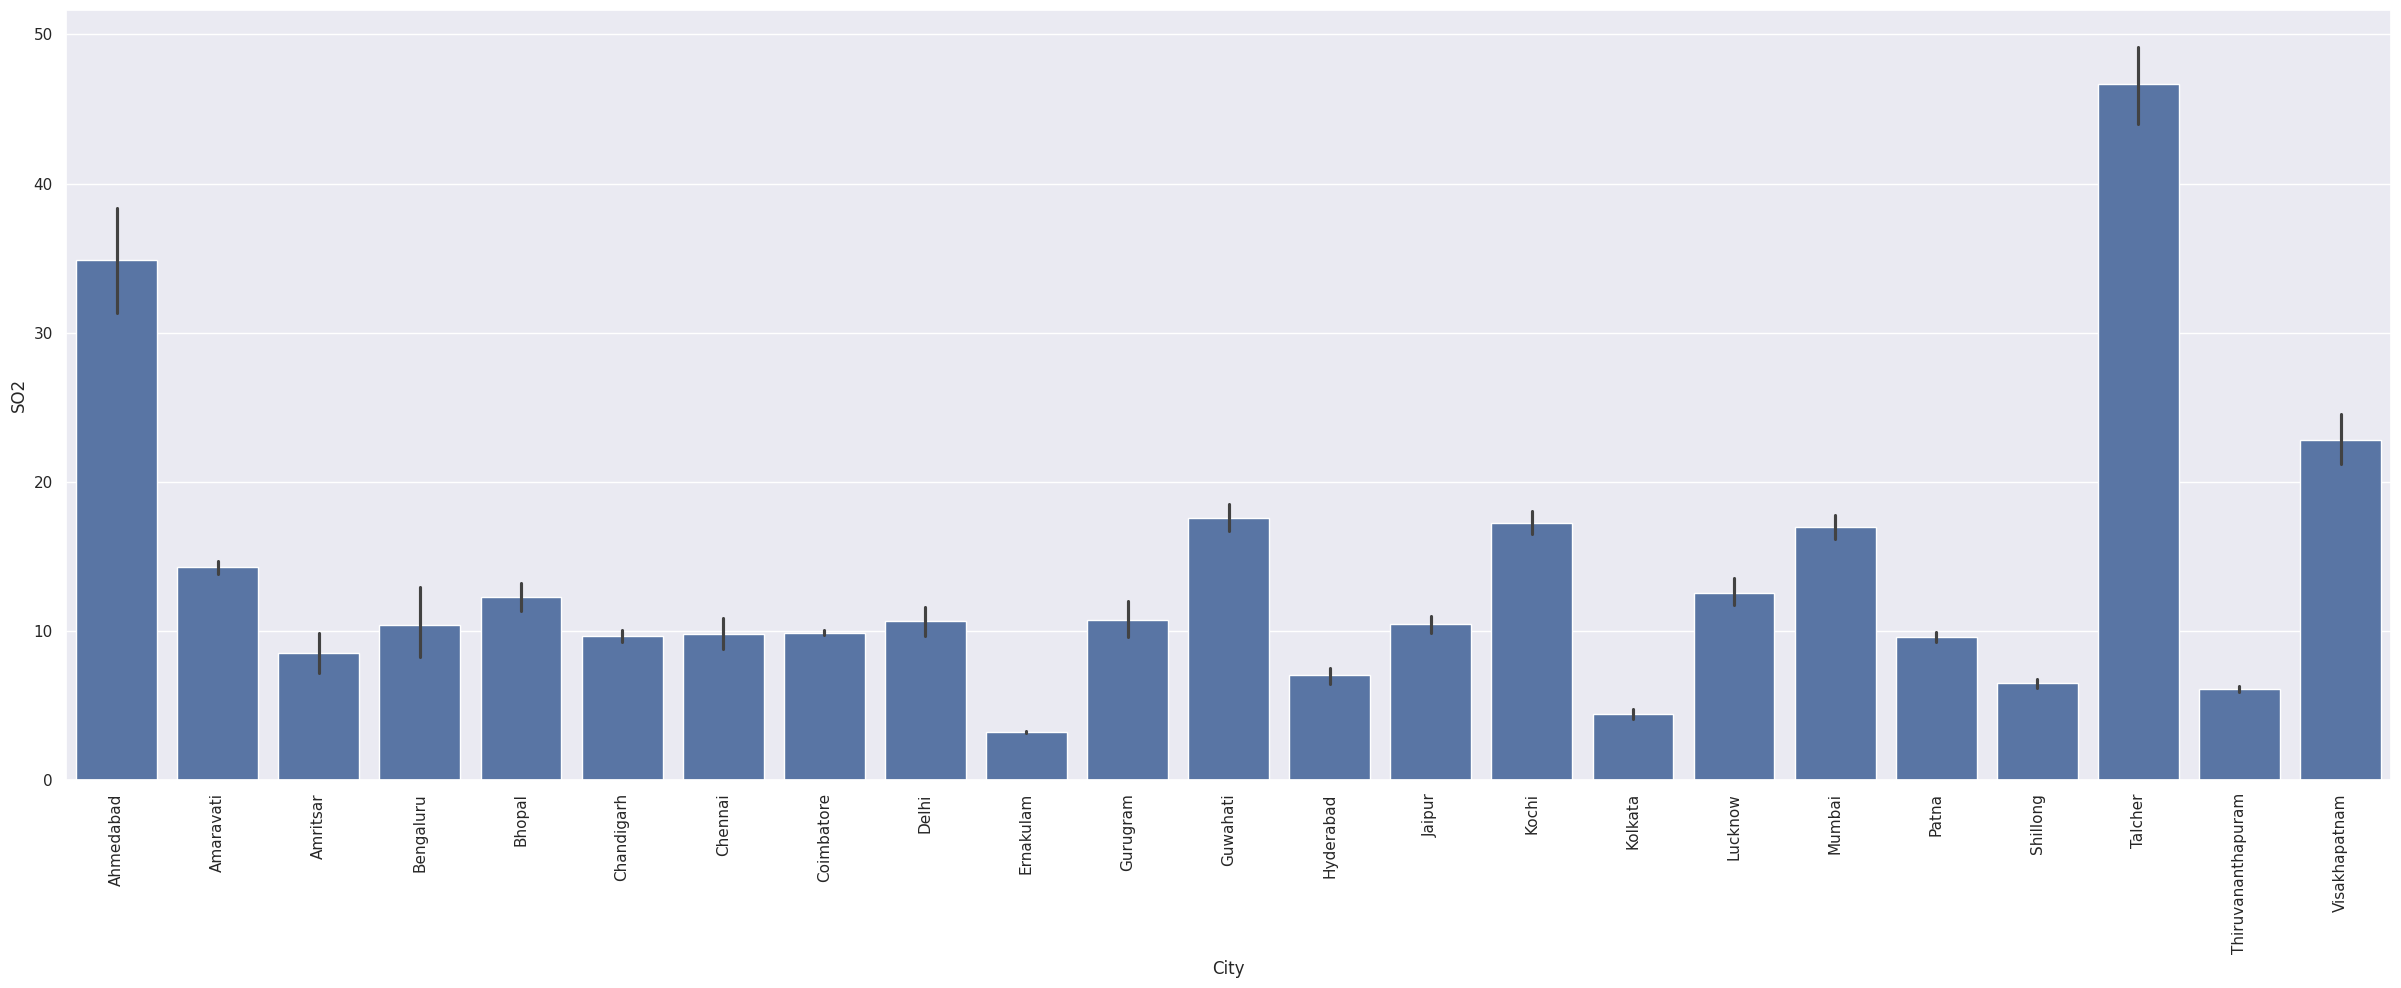

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SO2',data=df);
# This visualization shows the name of the state having higher so2 levels in the air which is Uttaranchal followed by Uttarakhand

In [ ]:
plt.rcParams['figure.figsize']=(30,10)

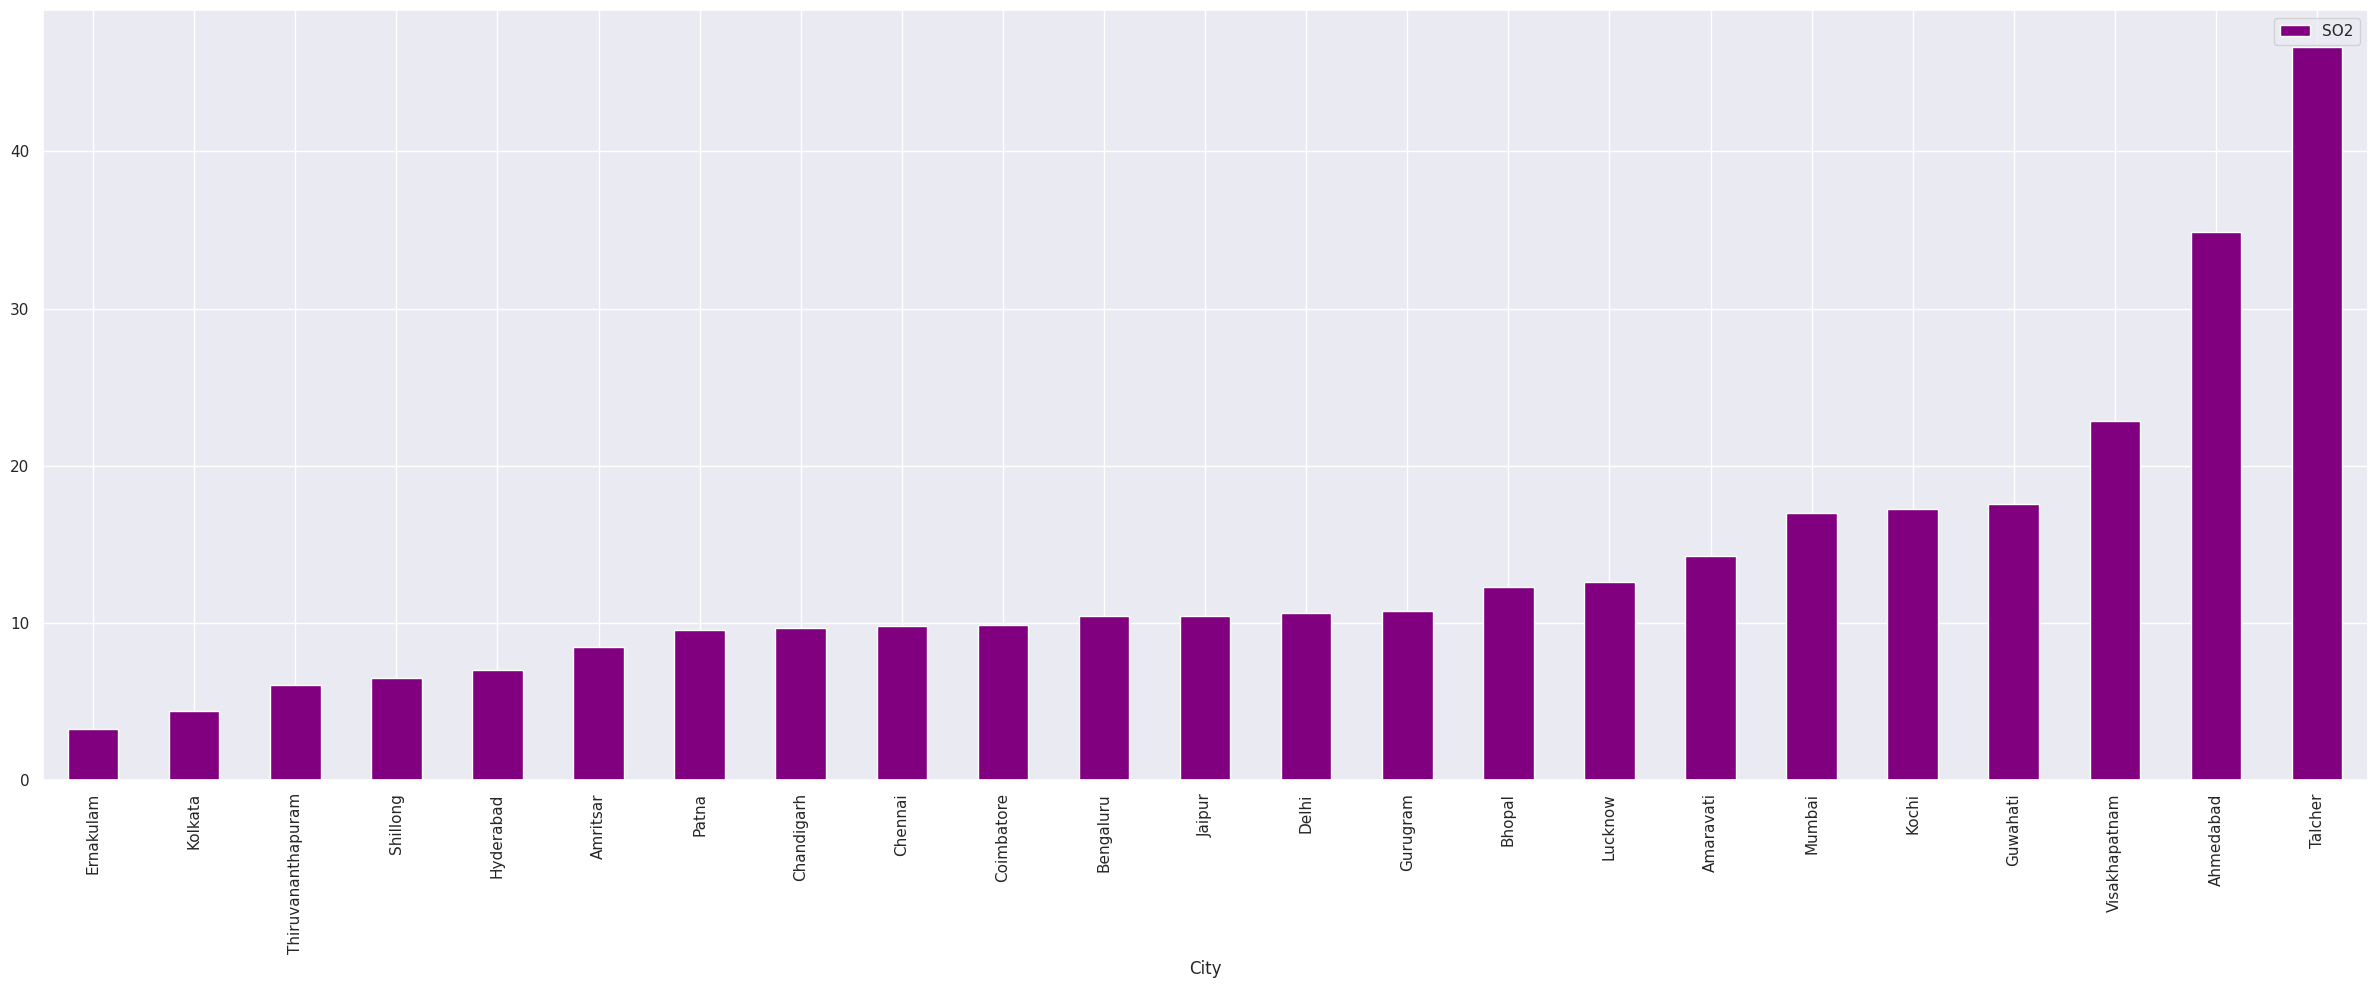

In [ ]:
df[['SO2','City']].groupby(["City"]).mean().sort_values(by='SO2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their so2 levels.

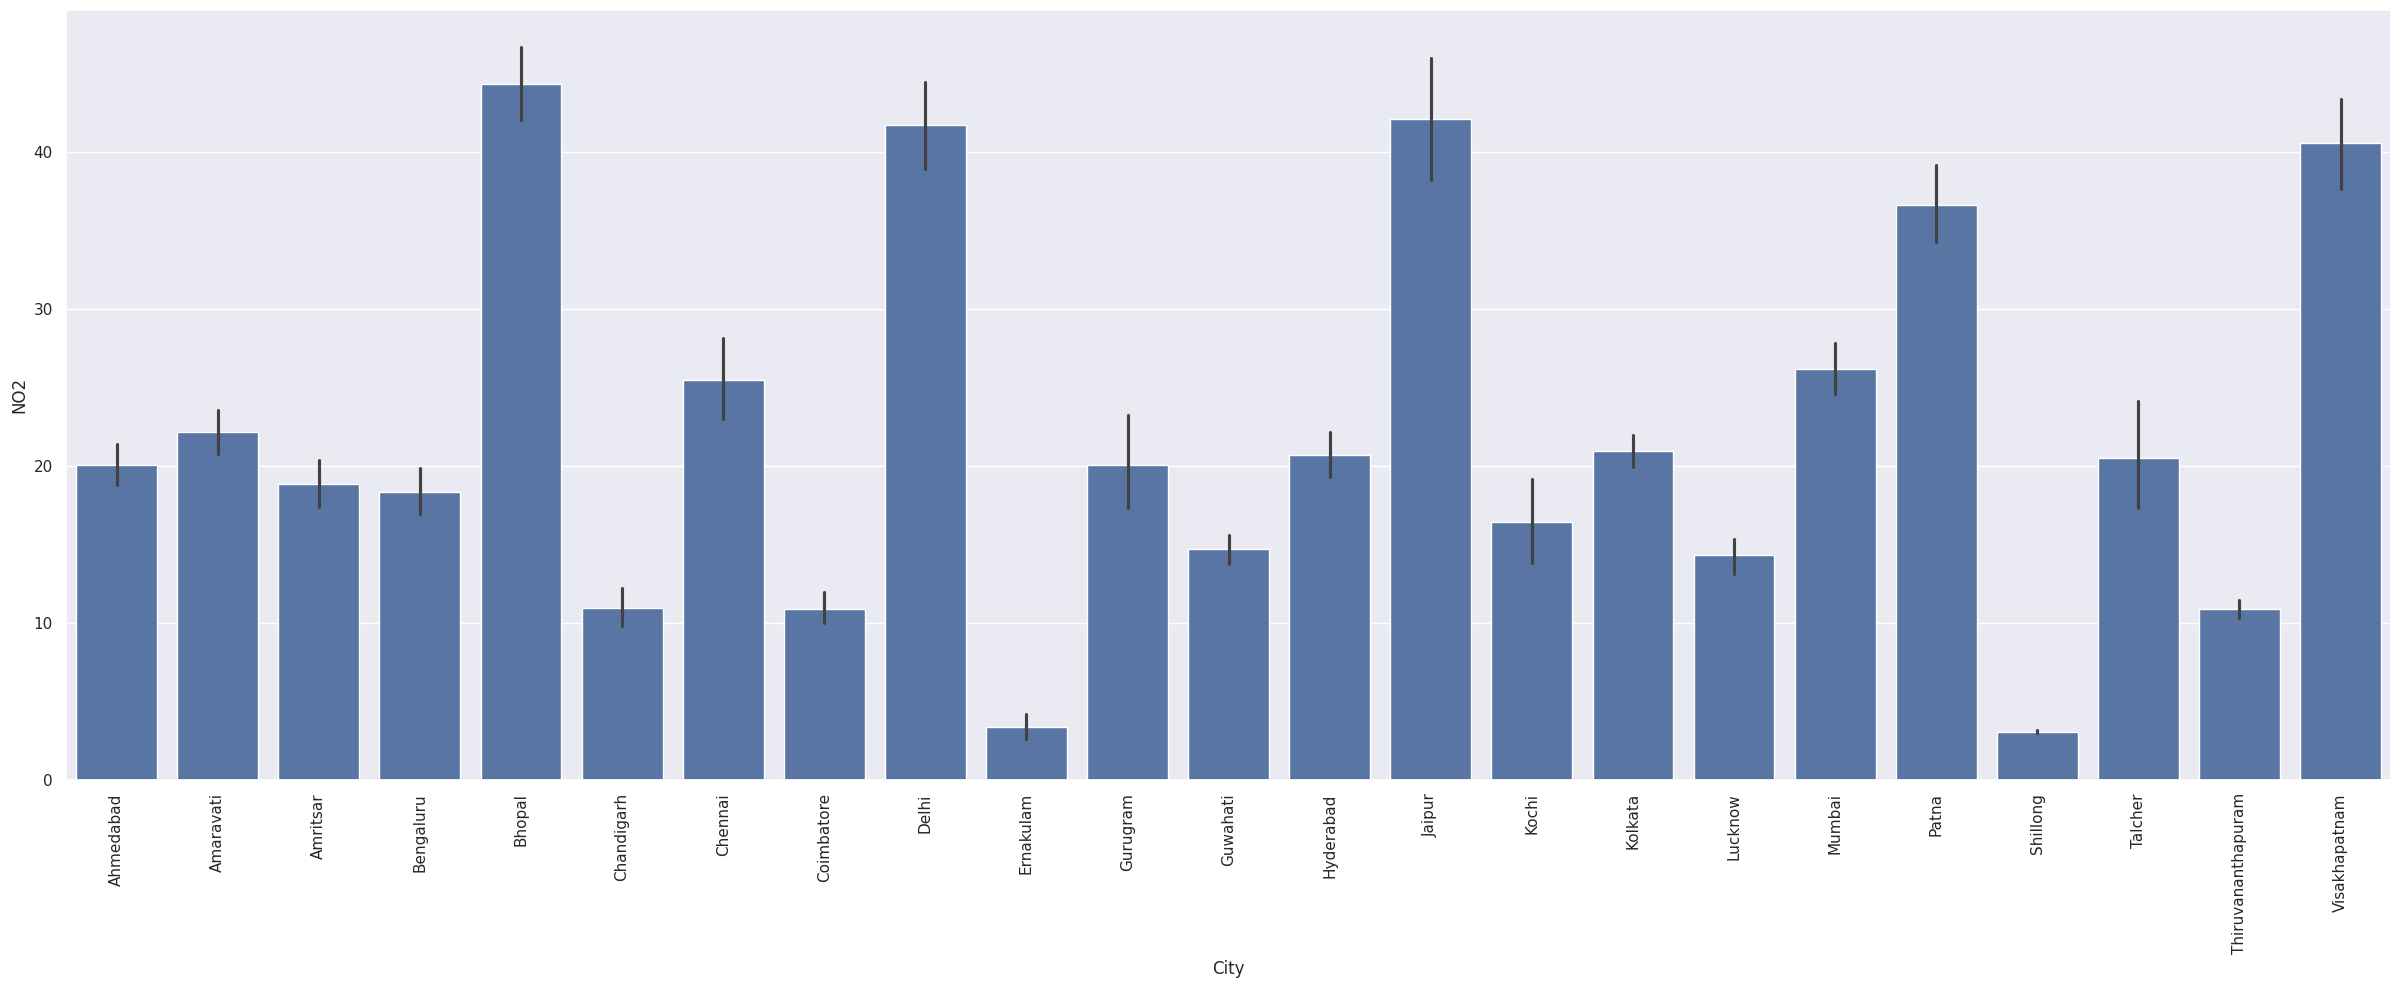

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NO2',data=df);
# West bengal has a higher no2 level compared to other states

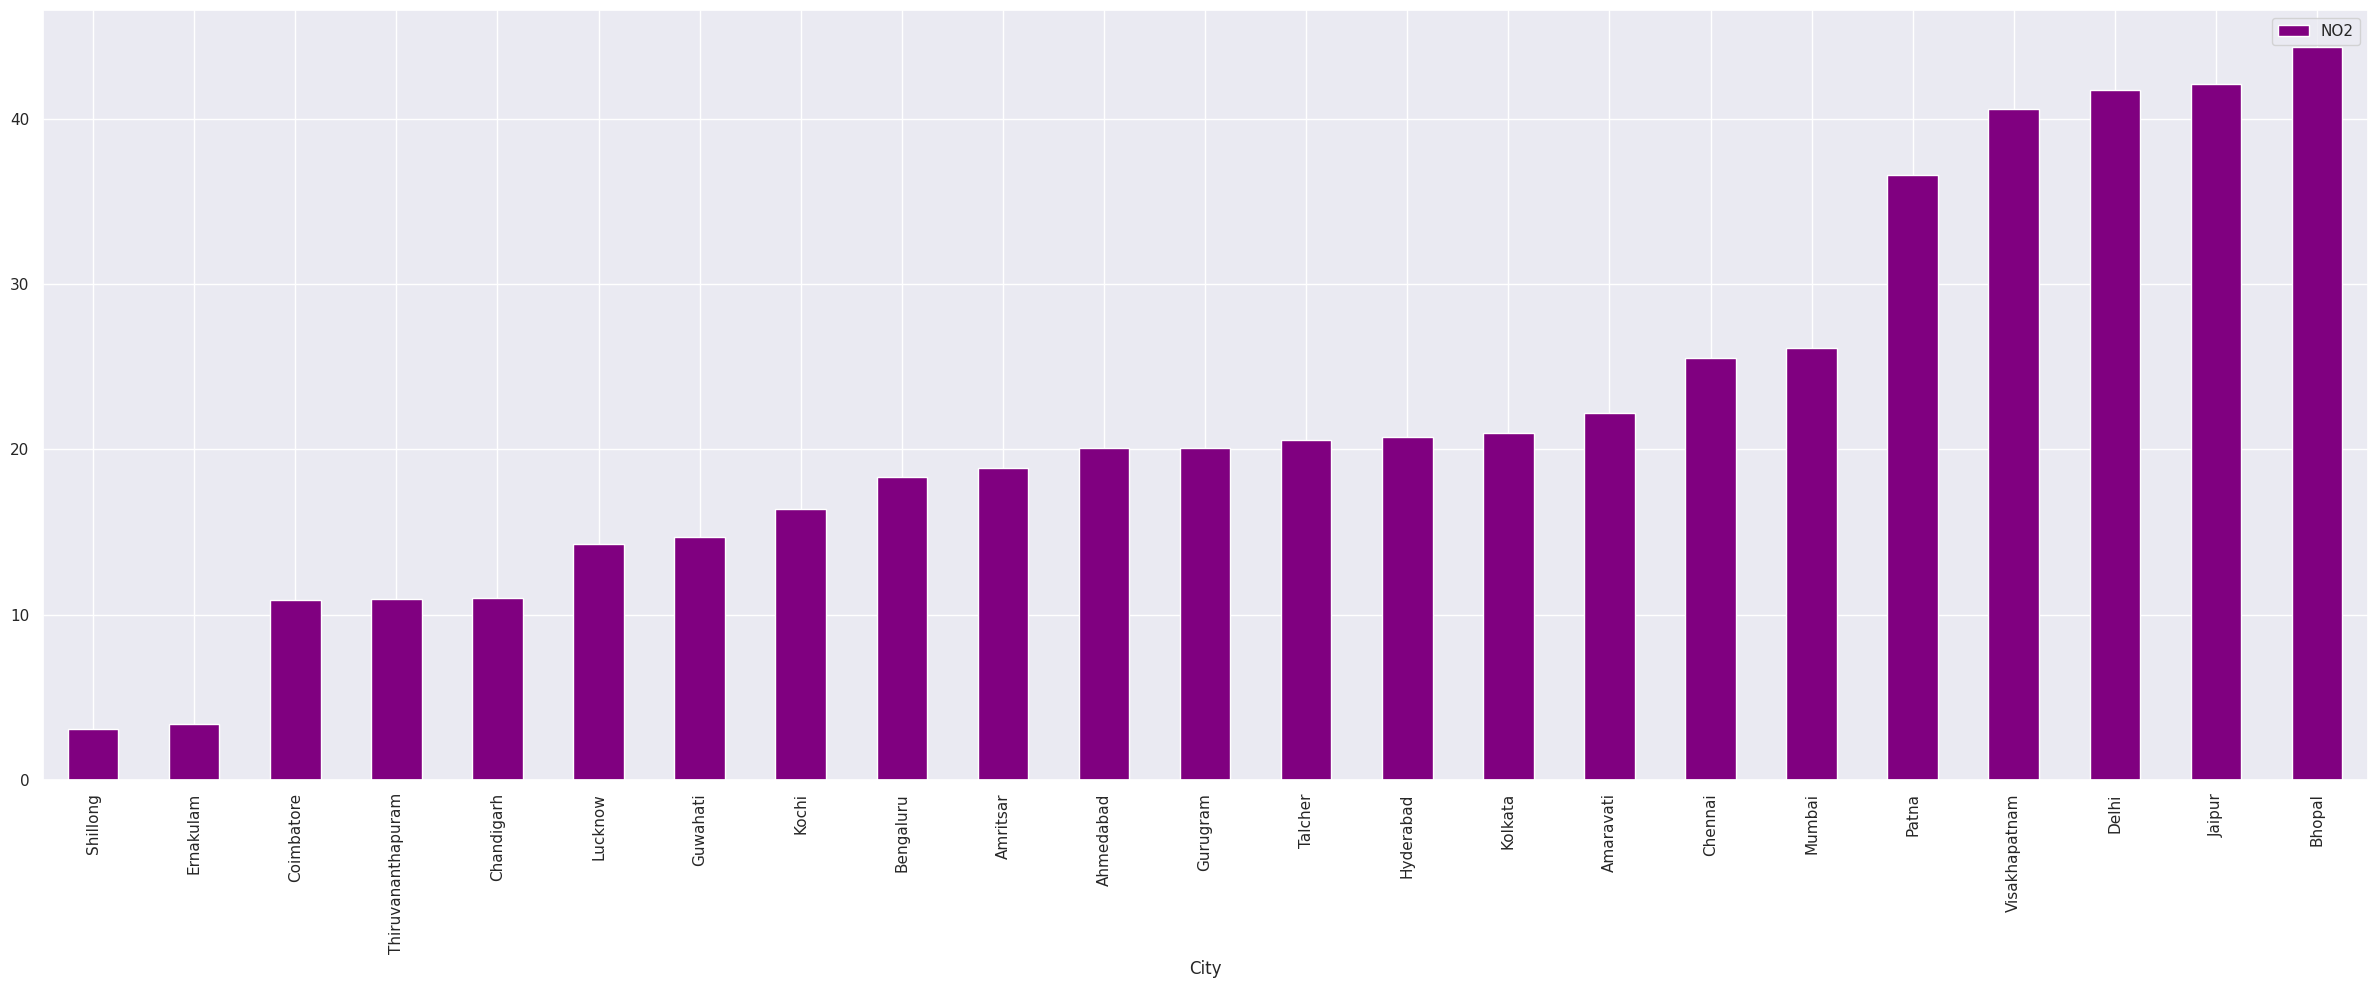

In [ ]:
df[['NO2','City']].groupby(["City"]).mean().sort_values(by='NO2').plot.bar(color='purple')
plt.show()
# We can also use the groupby function to sort values in an ascending order based on the x-axis, y-axis and its keys
# Below we get a clear picture of the states in an increasing order based on their no2 levels.

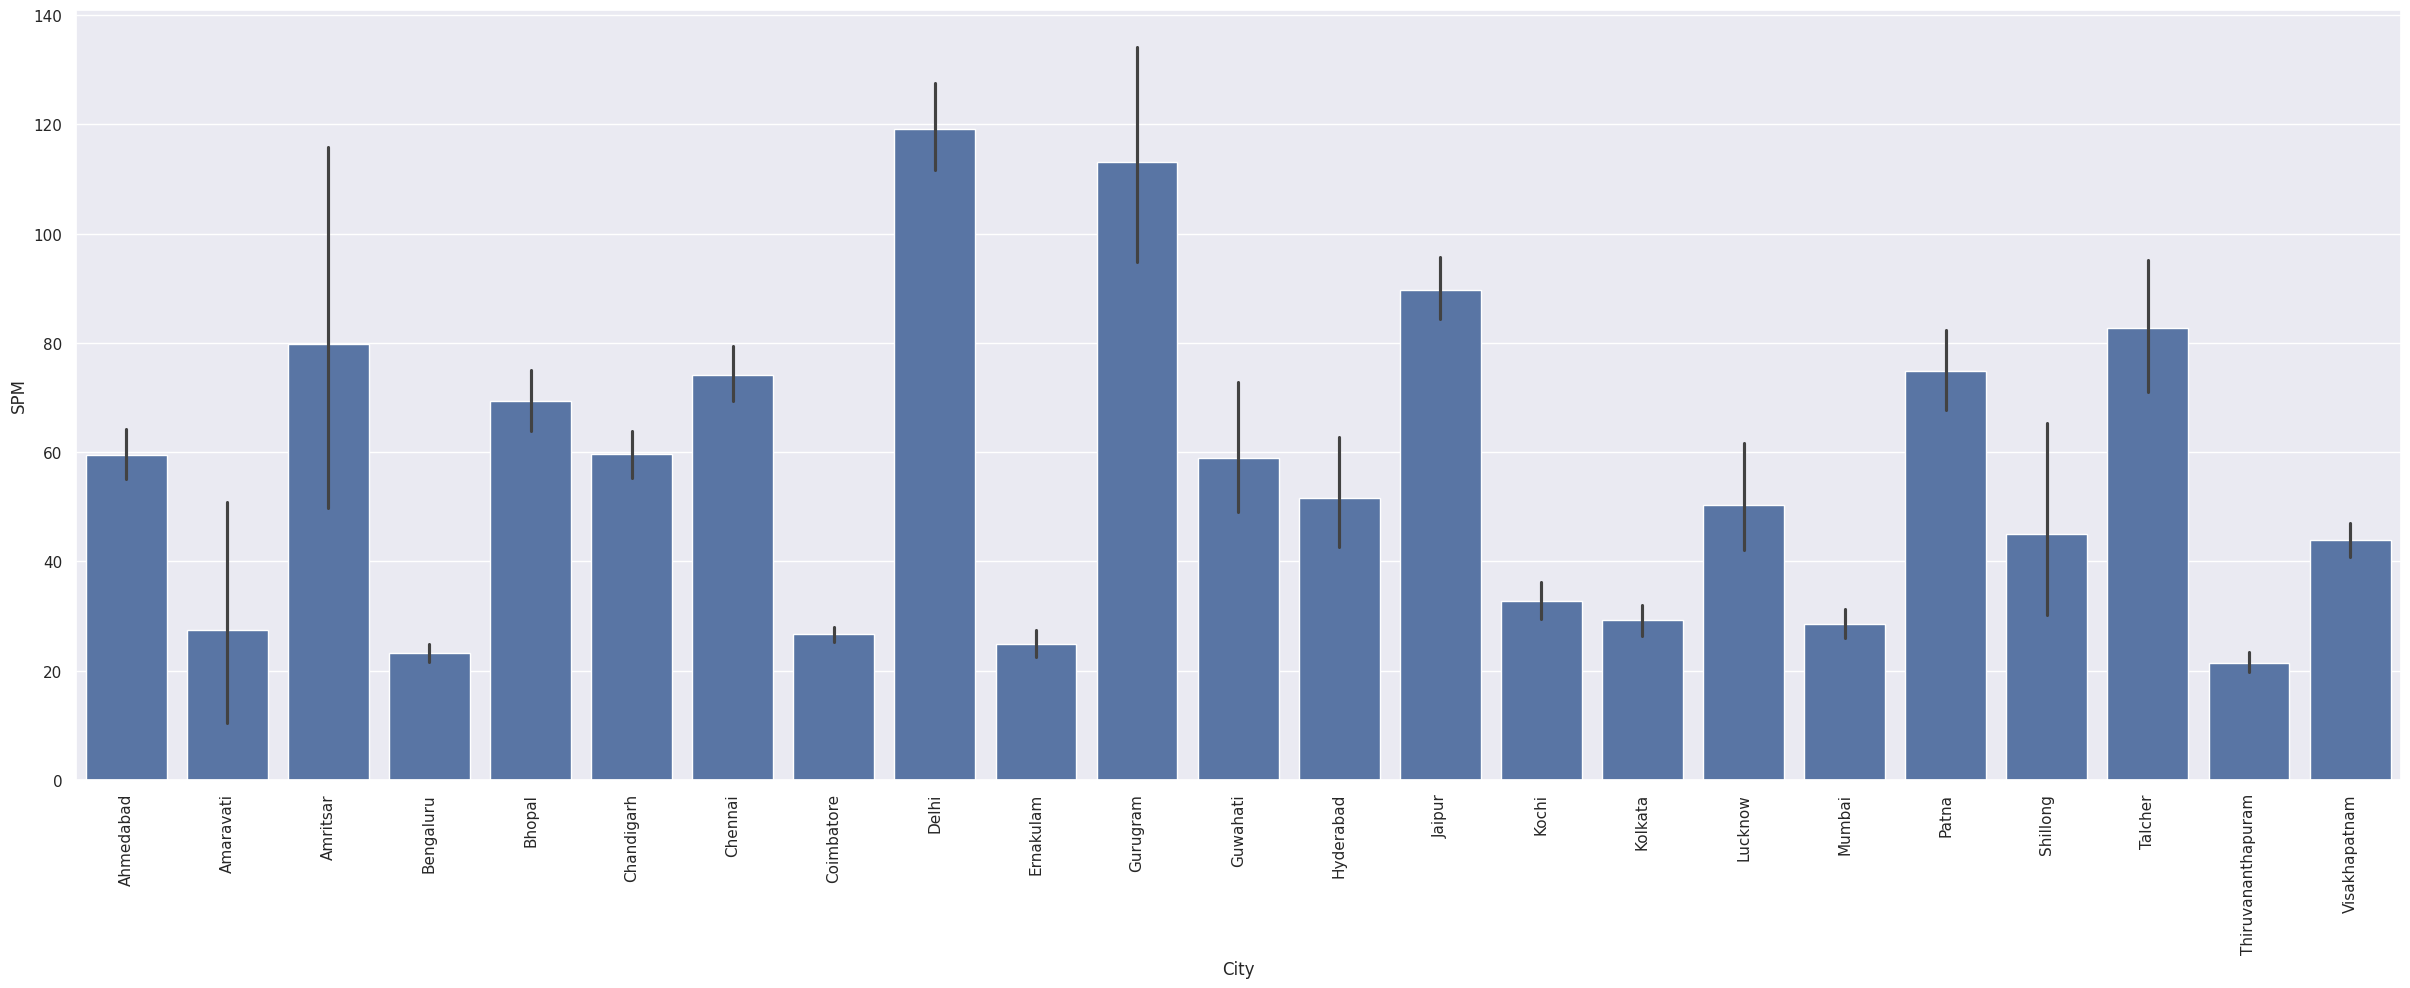

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='SPM',data=df);
# Delhi has higher rspm level compared to other states

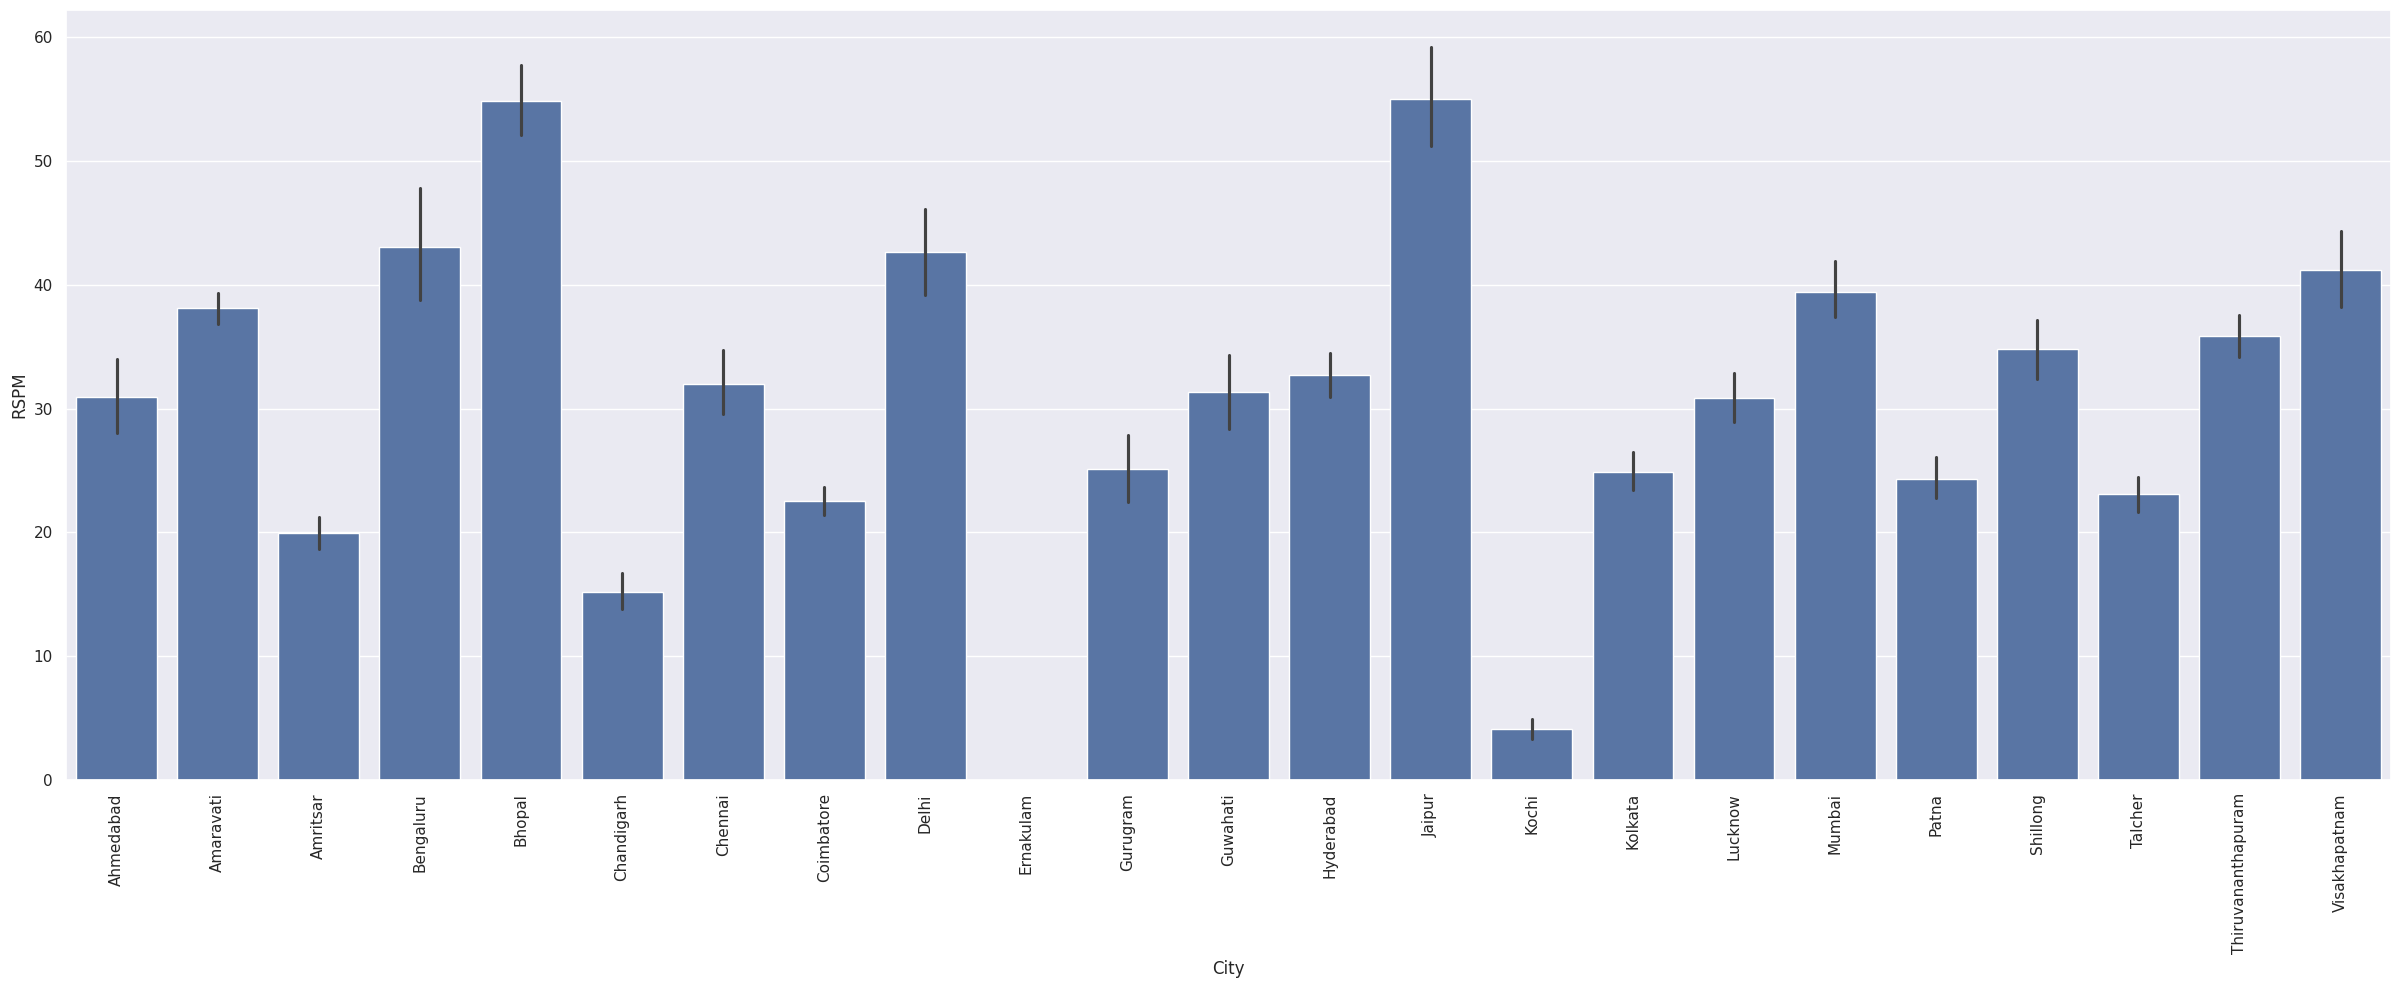

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='RSPM',data=df);
# Delhi has higher spm level compared to other states

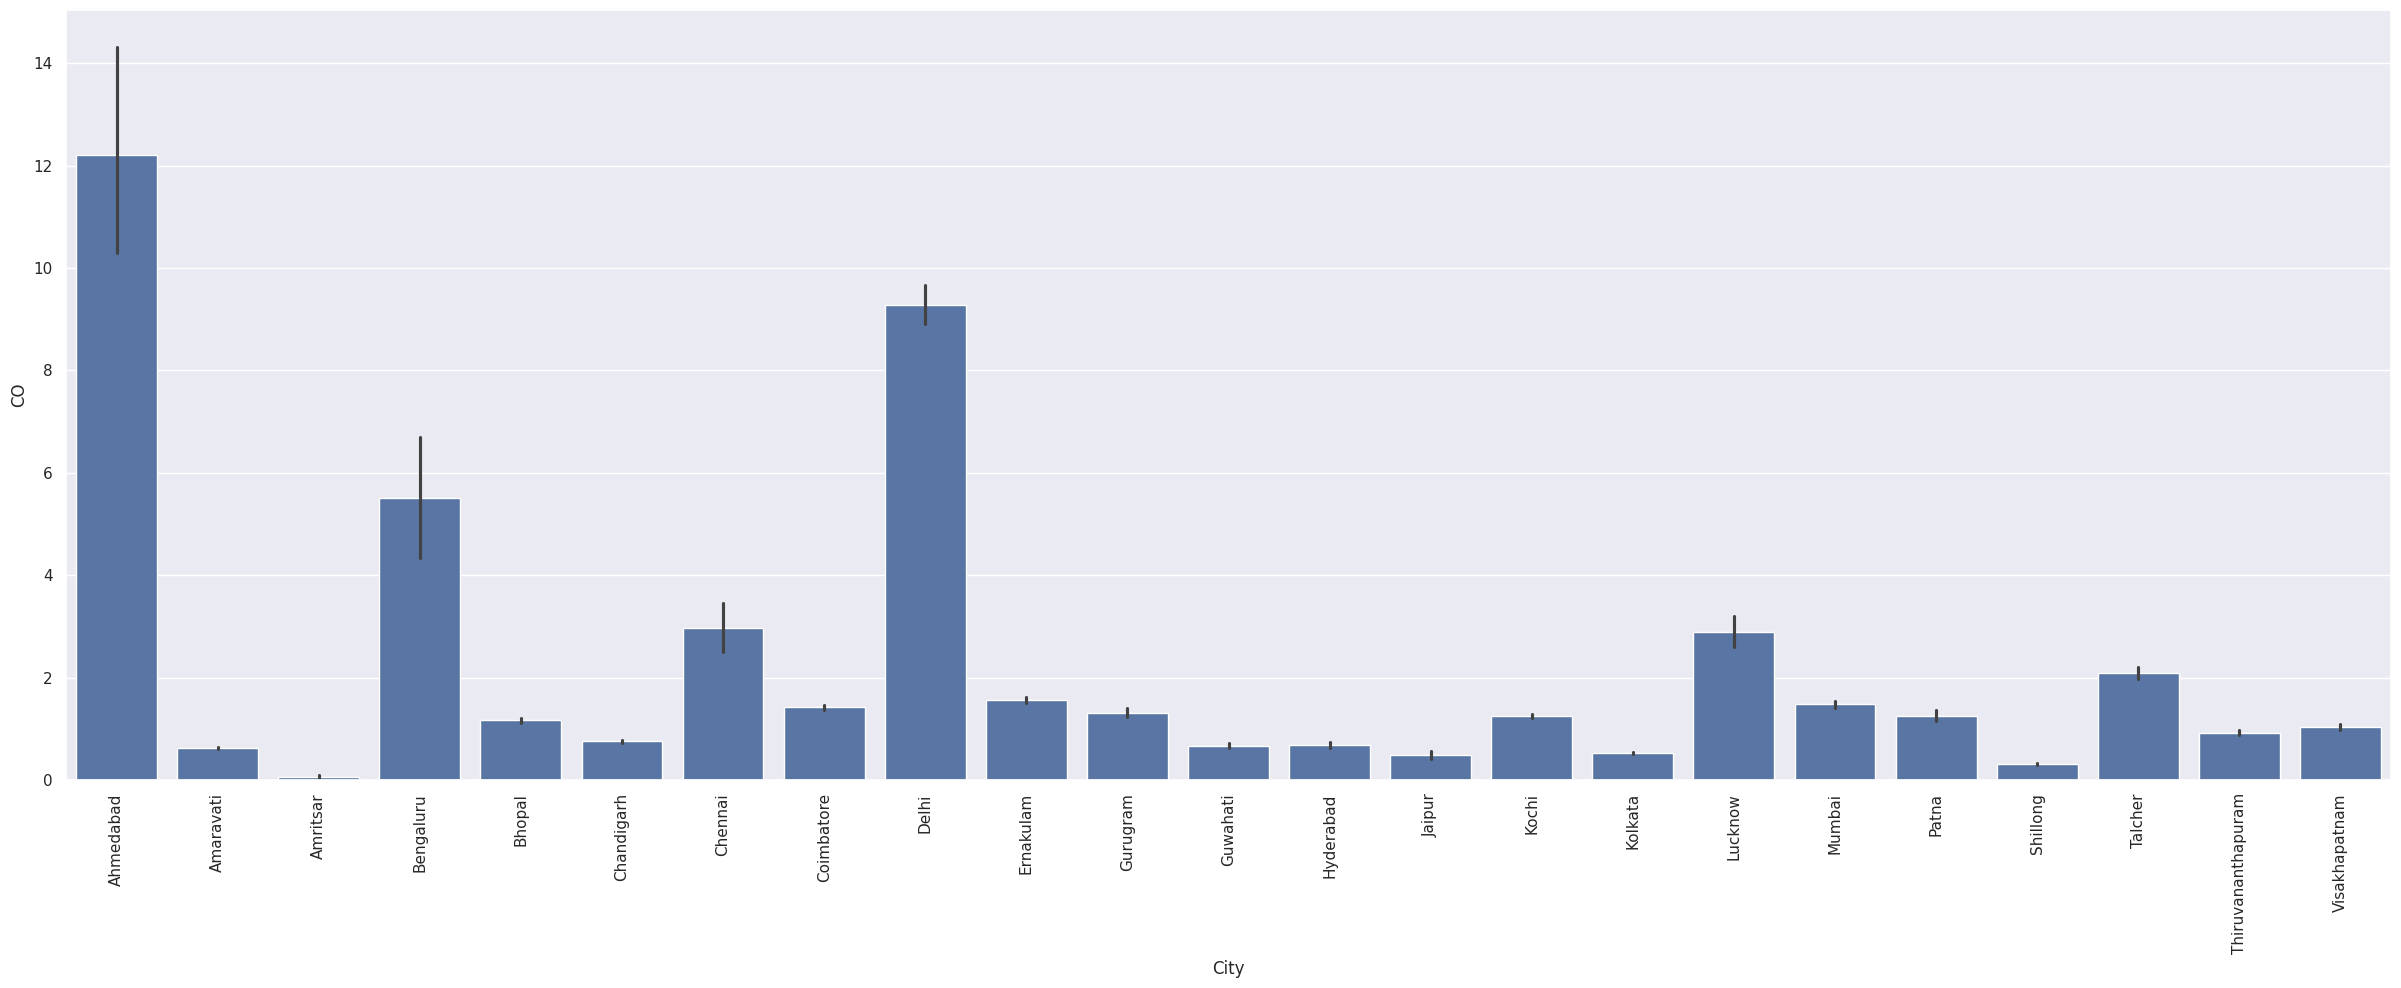

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='CO',data=df);
# Delhi has higher pm2_5 level compared to other states

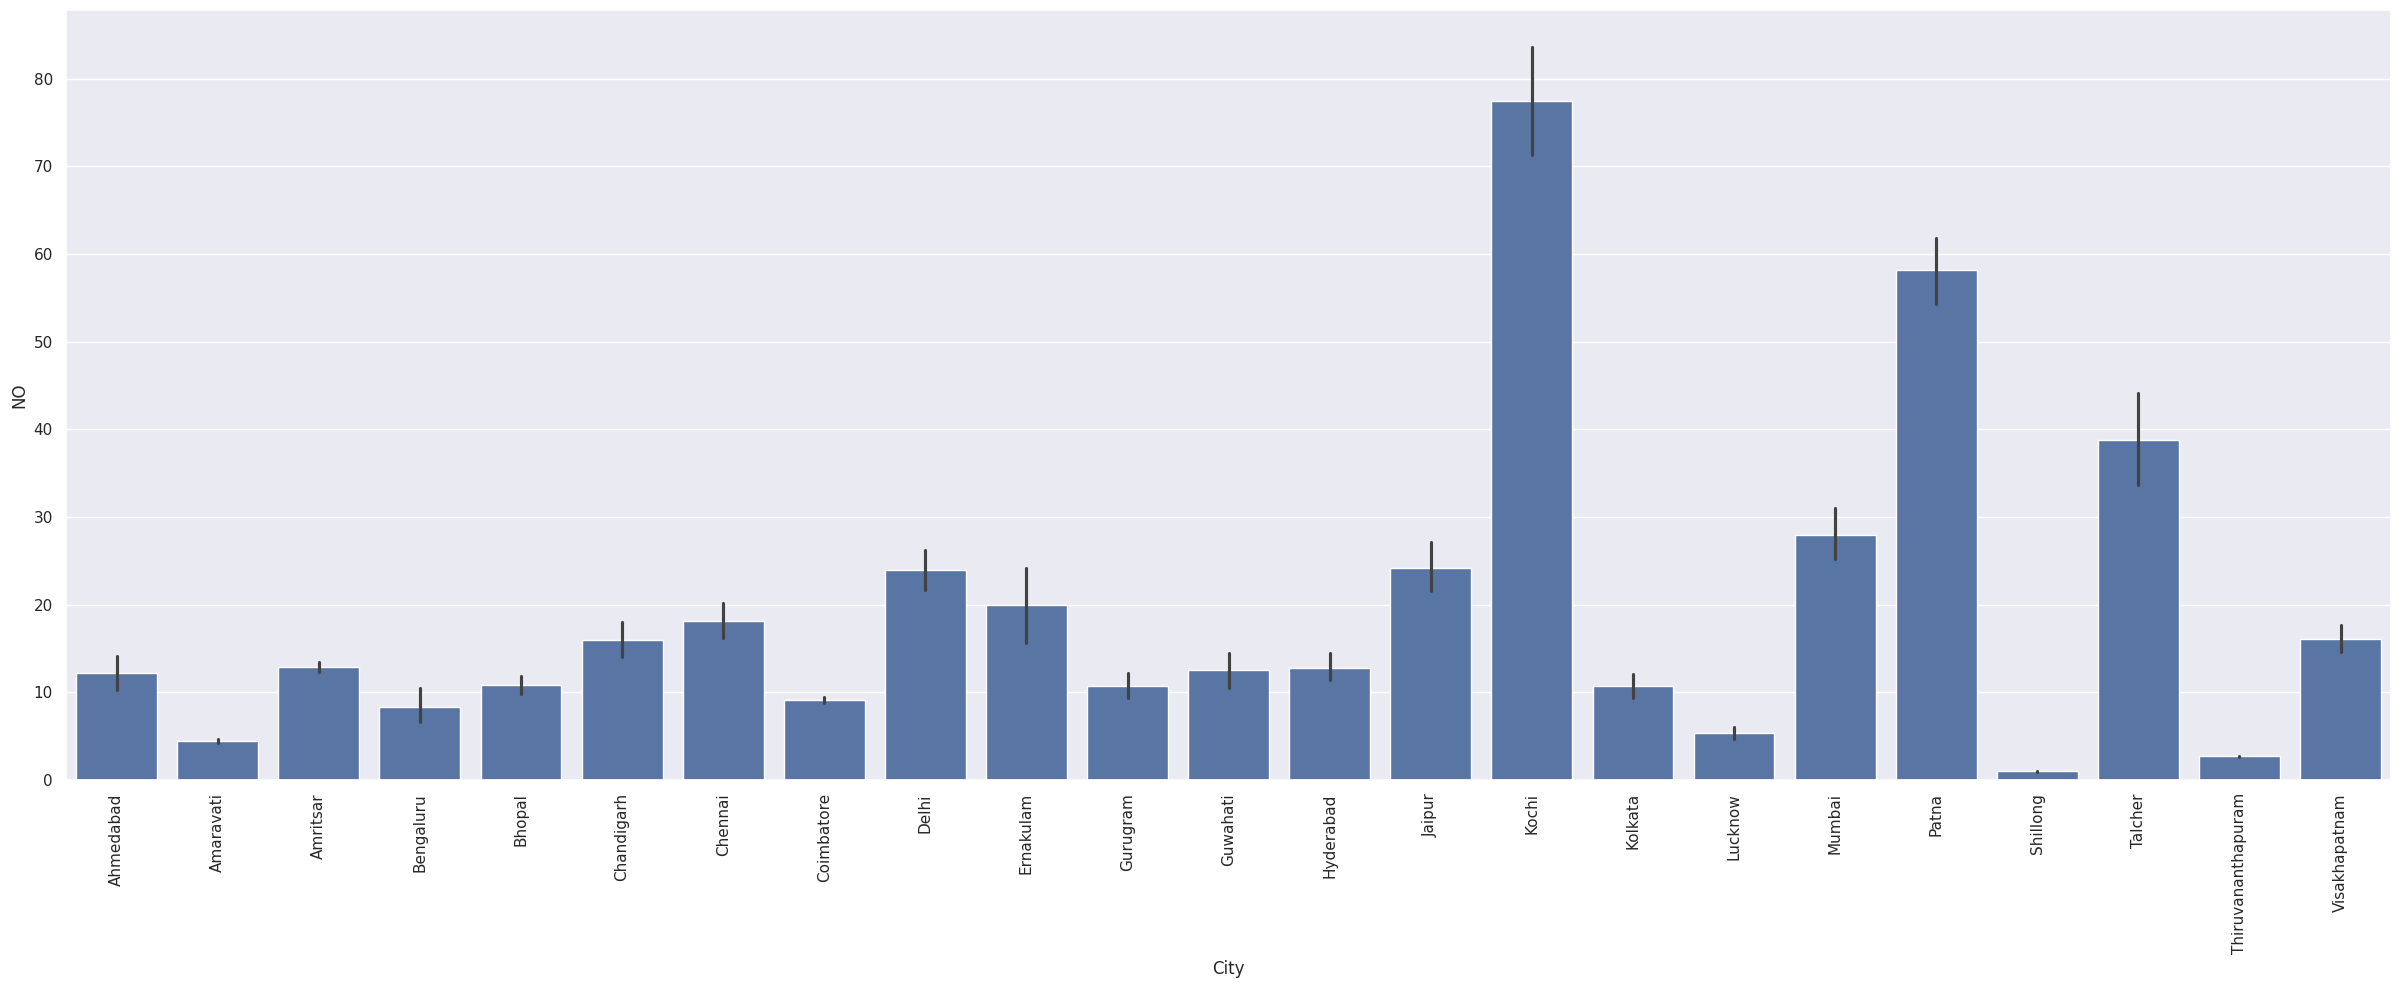

In [ ]:
plt.figure(figsize=(30, 10))
plt.xticks(rotation=90)
sns.barplot(x='City',y='NO',data=df);
# Delhi has higher pm2_5 level compared to other states

### Checking all null values and treating those null values.

In [ ]:
nullvalues = df.isnull().sum().sort_values(ascending=False)
# Checking all null values

In [ ]:
nullvalues
# higher null values present in pm2_5 followed by spm

,0
SPM,3603
AQI,2673
AQI_Bucket,2673
RSPM,2669
NOx,2613
NO2,2576
CO,2563
SO2,2533
NO,2522
City,2514


In [ ]:
null_values_percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
#count(returns Non-NAN value)

In [ ]:
missing_data_with_percentage = pd.concat([nullvalues, null_values_percentage], axis=1, keys=['Total', 'Percent'])
# Concatenating total null values and their percentage of missing values for further imputation or column deletion

In [ ]:
missing_data_with_percentage
# As you can see below these are the percentages of null values present in the dataset

,Total,Percent
SPM,3603,54.278397
AQI,2673,40.268153
AQI_Bucket,2673,40.268153
RSPM,2669,40.207894
NOx,2613,39.364266
NO2,2576,38.806870
CO,2563,38.611027
SO2,2533,38.159084
NO,2522,37.993371
City,2514,37.872853


In [ ]:
df.isnull().sum()
# Now checking the null values

,0
City,2514
Date,2514
Area,1072
SPM,3603
NO,2522
NO2,2576
NOx,2613
CO,2563
SO2,2533
RSPM,2669


In [ ]:
df

,City,Date,Area,SPM,NO,NO2,NOx,CO,SO2,RSPM,AQI,AQI_Bucket
0,Ahmedabad,01-03-2023,"Residential, Rural and other Areas",88.50,0.92,18.22,17.15,0.92,27.64,133.36,NaN,NaN
1,Ahmedabad,02-03-2023,Industrial Area,84.47,0.97,15.69,16.46,0.97,24.55,34.06,NaN,NaN
2,Ahmedabad,03-03-2023,"Residential, Rural and other Areas",73.54,17.40,19.30,29.70,17.40,29.07,30.70,NaN,NaN
3,Ahmedabad,04-03-2023,"Residential, Rural and other Areas",53.89,1.70,18.48,17.97,1.70,18.59,36.08,NaN,NaN
4,Ahmedabad,05-03-2023,Industrial Area,60.08,22.10,21.42,37.76,22.10,39.33,39.31,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6634,NaN,NaN,Sensitive Areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6635,NaN,NaN,Sensitive Areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6636,NaN,NaN,Sensitive Areas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.fillna(0, inplace=True)
# null values are replaced with zeros for the numerical data

In [ ]:
df.isnull().sum()
# Now we have successfully imputed null values which were present in the dataset

,0
City,0
Date,0
Area,0
SPM,0
NO,0
NO2,0
NOx,0
CO,0
SO2,0
RSPM,0


In [ ]:
df
# The following features are important for our machine learning models.

,City,Date,Area,SPM,NO,NO2,NOx,CO,SO2,RSPM,AQI,AQI_Bucket
0,Ahmedabad,01-03-2023,"Residential, Rural and other Areas",88.50,0.92,18.22,17.15,0.92,27.64,133.36,0.0,0
1,Ahmedabad,02-03-2023,Industrial Area,84.47,0.97,15.69,16.46,0.97,24.55,34.06,0.0,0
2,Ahmedabad,03-03-2023,"Residential, Rural and other Areas",73.54,17.40,19.30,29.70,17.40,29.07,30.70,0.0,0
3,Ahmedabad,04-03-2023,"Residential, Rural and other Areas",53.89,1.70,18.48,17.97,1.70,18.59,36.08,0.0,0
4,Ahmedabad,05-03-2023,Industrial Area,60.08,22.10,21.42,37.76,22.10,39.33,39.31,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
6633,0,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0
6634,0,0,Sensitive Areas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0
6635,0,0,Sensitive Areas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0
6636,0,0,Sensitive Areas,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0


# CALCULATE AIR QUALITY INDEX FOR SO2 BASED ON FORMULA
The air quality index is a piecewise linear function of the pollutant concentration. At the boundary between AQI categories, there is a discontinuous jump of one AQI unit. To convert from concentration to AQI this equation is used

### Function to calculate so2 individual pollutant index(si)

In [ ]:
def cal_SOi(SO2):
    si=0
    if (SO2<=40):
     si= SO2*(50/40)
    elif (SO2>40 and SO2<=80):
     si= 50+(SO2-40)*(50/40)
    elif (SO2>80 and SO2<=380):
     si= 100+(SO2-80)*(100/300)
    elif (SO2>380 and SO2<=800):
     si= 200+(SO2-380)*(100/420)
    elif (SO2>800 and SO2<=1600):
     si= 300+(SO2-800)*(100/800)
    elif (SO2>1600):
     si= 400+(SO2-1600)*(100/800)
    return si
df['SOi']=df['SO2'].apply(cal_SOi)
data= df[['SO2','SOi']]
data.head()
# calculating the individual pollutant index for so2(sulphur dioxide)

,SO2,SOi
0,27.64,34.5500
1,24.55,30.6875
2,29.07,36.3375
3,18.59,23.2375
4,39.33,49.1625


### Function to calculate no2 individual pollutant index(ni)

In [ ]:
def cal_Noi(NO2):
    ni=0
    if(NO2<=40):
     ni= NO2*50/40
    elif(NO2>40 and NO2<=80):
     ni= 50+(NO2-40)*(50/40)
    elif(NO2>80 and NO2<=180):
     ni= 100+(NO2-80)*(100/100)
    elif(NO2>180 and NO2<=280):
     ni= 200+(NO2-180)*(100/100)
    elif(NO2>280 and NO2<=400):
     ni= 300+(NO2-280)*(100/120)
    else:
     ni= 400+(NO2-400)*(100/120)
    return ni
df['Noi']=df['NO2'].apply(cal_Noi)
data= df[['NO2','Noi']]
data.head()
# calculating the individual pollutant index for no2(nitrogen dioxide)

,NO2,Noi
0,18.22,22.7750
1,15.69,19.6125
2,19.30,24.1250
3,18.48,23.1000
4,21.42,26.7750


### Function to calculate rspm individual pollutant index(rpi)

In [ ]:
def cal_RSPMI(RSPM):
    rpi=0
    if(RSPM<=30):
     rpi=RSPM*50/30
    elif(RSPM>30 and RSPM<=60):
     rpi=50+(rpi-30)*50/30
    elif(RSPM>60 and RSPM<=90):
     rpi=100+(RSPM-60)*100/30
    elif(RSPM>90 and RSPM<=120):
     rpi=200+(RSPM-90)*100/30
    elif(RSPM>120 and RSPM<=250):
     rpi=300+(RSPM-120)*(100/130)
    else:
     rpi=400+(RSPM-250)*(100/130)
    return rpi
df['Rpi']=df['RSPM'].apply(cal_RSPMI)
data= df[['RSPM','Rpi']]
data.head()
# calculating the individual pollutant index for rspm(respirable suspended particualte matter concentration)

,RSPM,Rpi
0,133.36,310.276923
1,34.06,0.000000
2,30.70,0.000000
3,36.08,0.000000
4,39.31,0.000000


Function to calculate spm individual pollutant index(spi)


In [ ]:
def cal_SPMi(SPM):
    spi=0
    if(SPM<=50):
     spi=SPM*50/50
    elif(SPM>50 and SPM<=100):
     spi=50+(SPM-50)*(50/50)
    elif(SPM>100 and SPM<=250):
     spi= 100+(SPM-100)*(100/150)
    elif(SPM>250 and SPM<=350):
     spi=200+(SPM-250)*(100/100)
    elif(SPM>350 and SPM<=430):
     spi=300+(SPM-350)*(100/80)
    else:
     spi=400+(SPM-430)*(100/430)
    return spi

df['SPMi']=df['SPM'].apply(cal_SPMi)
data= df[['SPM','SPMi']]
data.head()
# calculating the individual pollutant index for spm(suspended particulate matter)

,SPM,SPMi
0,88.50,88.50
1,84.47,84.47
2,73.54,73.54
3,53.89,53.89
4,60.08,60.08


### function to calculate the air quality index (AQI) of every data value

In [ ]:
def cal_aqi(si,ni,rspmi,spmi):
    aqi=0
    if(si>ni and si>rspmi and si>spmi):
     aqi=si
    if(ni>si and ni>rspmi and ni>spmi):
     aqi=ni
    if(rspmi>si and rspmi>ni and rspmi>spmi):
     aqi=rspmi
    if(spmi>si and spmi>ni and spmi>rspmi):
     aqi=spmi
    return aqi

df['AQI']=df.apply(lambda x:cal_aqi(x['SOi'],x['Noi'],x['Rpi'],x['SPMi']),axis=1)
data= df[['City','SOi','Noi','Rpi','SPMi','AQI']]
data.head()
# Caluclating the Air Quality Index.

,City,SOi,Noi,Rpi,SPMi,AQI
0,Ahmedabad,34.5500,22.7750,310.276923,88.50,310.276923
1,Ahmedabad,30.6875,19.6125,0.000000,84.47,84.470000
2,Ahmedabad,36.3375,24.1250,0.000000,73.54,73.540000
3,Ahmedabad,23.2375,23.1000,0.000000,53.89,53.890000
4,Ahmedabad,49.1625,26.7750,0.000000,60.08,60.080000


In [ ]:
def AQI_Range(x):
    if x<=50:
        return "Good"
    elif x>50 and x<=100:
        return "Moderate"
    elif x>100 and x<=200:
        return "Poor"
    elif x>200 and x<=300:
        return "Unhealthy"
    elif x>300 and x<=400:
        return "Very unhealthy"
    elif x>400:
        return "Hazardous"

df['AQI_Range'] = df['AQI'] .apply(AQI_Range)
df.head()
# Using threshold values to classify a particular values as good, moderate, poor, unhealthy, very unhealthy and Hazardous

,City,Date,Area,SPM,NO,NO2,NOx,CO,SO2,RSPM,AQI,AQI_Bucket,SOi,Noi,Rpi,SPMi,AQI_Range
0,Ahmedabad,01-03-2023,"Residential, Rural and other Areas",88.50,0.92,18.22,17.15,0.92,27.64,133.36,310.276923,0,34.5500,22.7750,310.276923,88.50,Very unhealthy
1,Ahmedabad,02-03-2023,Industrial Area,84.47,0.97,15.69,16.46,0.97,24.55,34.06,84.470000,0,30.6875,19.6125,0.000000,84.47,Moderate
2,Ahmedabad,03-03-2023,"Residential, Rural and other Areas",73.54,17.40,19.30,29.70,17.40,29.07,30.70,73.540000,0,36.3375,24.1250,0.000000,73.54,Moderate
3,Ahmedabad,04-03-2023,"Residential, Rural and other Areas",53.89,1.70,18.48,17.97,1.70,18.59,36.08,53.890000,0,23.2375,23.1000,0.000000,53.89,Moderate
4,Ahmedabad,05-03-2023,Industrial Area,60.08,22.10,21.42,37.76,22.10,39.33,39.31,60.080000,0,49.1625,26.7750,0.000000,60.08,Moderate


In [ ]:
df['AQI_Range'].value_counts()
# These are the counts of values present in the AQI_Range column.

,count
AQI_Range,
Good,4960
Moderate,963
Poor,625
Unhealthy,63
Hazardous,14
Very unhealthy,13


### From above heatmap we observe a strong correlation of NO with NOx and of SPM with RSPM so lets visualize them with the help of scatterplots¶


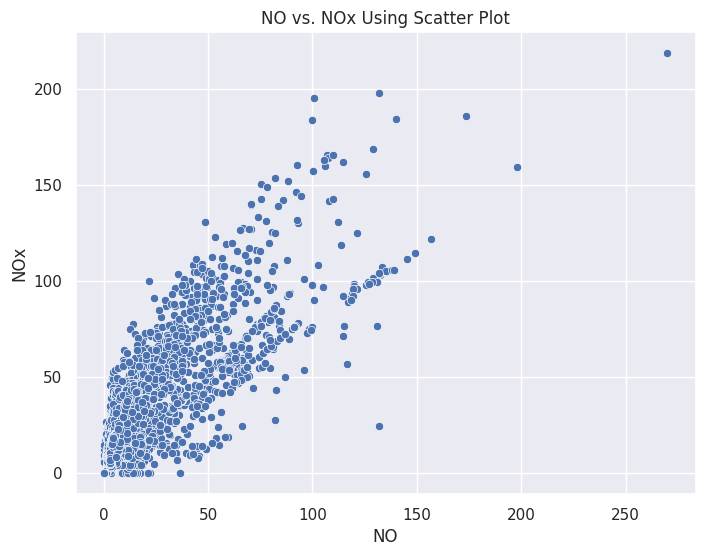

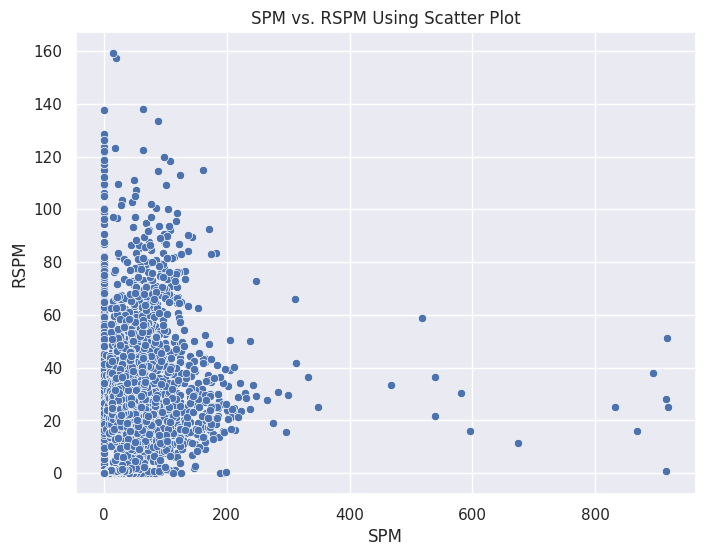

In [ ]:
sns.set(rc={'figure.figsize': (8, 6)})
# plt.figure(figsize=(12, 6))
plt.figure(figsize=(8, 6))
sns.scatterplot(x='NO', y='NOx', data=df)
plt.title('NO vs. NOx Using Scatter Plot')
plt.show()

sns.scatterplot(x='SPM', y='RSPM', data=df)
plt.title('SPM vs. RSPM Using Scatter Plot')
plt.show()

### Splitting the dataset into Dependent and Independent columns

In [ ]:
X=df[['SOi','Noi','Rpi','SPMi']]
Y=df['AQI']
X.head()
# we only select columns like soi, noi, rpi, spmi

,SOi,Noi,Rpi,SPMi
0,34.5500,22.7750,310.276923,88.50
1,30.6875,19.6125,0.000000,84.47
2,36.3375,24.1250,0.000000,73.54
3,23.2375,23.1000,0.000000,53.89
4,49.1625,26.7750,0.000000,60.08


In [ ]:
Y.head()
# the AQI column is the target column

,AQI
0,310.276923
1,84.470000
2,73.540000
3,53.890000
4,60.080000


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=70)
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)
# splitting the data into training and testing data

(5310, 4) (1328, 4) (5310,) (1328,)


### Linear Regression

In [ ]:
model=LinearRegression()
model.fit(X_train,Y_train)

LinearRegression()

In [ ]:
#predicting train
train_pred=model.predict(X_train)
#predicting on test
test_pred=model.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_pred)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_pred)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',model.score(X_train, Y_train))
print('RSquared value on test:',model.score(X_test, Y_test))

RMSE TrainingData =  15.386677943099489
RMSE TestData =  13.258479884840515
--------------------------------------------------
RSquared value on train: 0.9114552631661379
RSquared value on test: 0.9196852561964763


# Decision Tree:

In [ ]:
# Decision Tree Tegression Model:

dec_tree = DecisionTreeRegressor(random_state = 0)
dec_tree.fit(x_train,y_train)
dt_y_predict = dec_tree.predict(x_test)

### Decision Tree Regressor

In [ ]:
DT=DecisionTreeRegressor()
DT.fit(X_train,Y_train)

DecisionTreeRegressor()

In [ ]:
#predicting train
train_preds=DT.predict(X_train)
#predicting on test
test_preds=DT.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',DT.score(X_train, Y_train))
print('RSquared value on test:',DT.score(X_test, Y_test))

RMSE TrainingData =  0.0
RMSE TestData =  1.4986526595066982
--------------------------------------------------
RSquared value on train: 1.0
RSquared value on test: 0.9989738525088534


### Decision Tree Classifier

In [ ]:
#fit the model on train data
DT2 = DecisionTreeClassifier().fit(X_train2,Y_train2)

#predict on train
train_preds3 = DT2.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds3))

#predict on test
test_preds3 = DT2.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds3))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds3))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9968051118210862
--------------------------------------------------
KappaScore is:  0.9922349690173391


# 4. Random Forest:

In [ ]:
# Random Forest Regression Model
# Random Forest with 500 trees

rt_reg = RandomForestRegressor(n_estimators = 500, random_state = 0)
rt_reg.fit(x_train,y_train)
rt_y_predict = rt_reg.predict(x_test)

### Random Forest Regressor

In [ ]:
RF=RandomForestRegressor().fit(X_train,Y_train)

In [ ]:
#predicting train
train_preds1=RF.predict(X_train)
#predicting on test
test_preds1=RF.predict(X_test)

In [ ]:
RMSE_train=(np.sqrt(metrics.mean_squared_error(Y_train,train_preds1)))
RMSE_test=(np.sqrt(metrics.mean_squared_error(Y_test,test_preds1)))
print("RMSE TrainingData = ",str(RMSE_train))
print("RMSE TestData = ",str(RMSE_test))
print('-'*50)
print('RSquared value on train:',RF.score(X_train, Y_train))
print('RSquared value on test:',RF.score(X_test, Y_test))

RMSE TrainingData =  0.6467709292069325
RMSE TestData =  1.360159770527158
--------------------------------------------------
RSquared value on train: 0.9998435505623446
RSquared value on test: 0.9991547451695609


### Random Forest Classifier

In [ ]:
#fit the model on train data
RF=RandomForestClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds4 = RF.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds4))

#predict on test
test_preds4 = RF.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds4))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds4))

Model accuracy on train is:  1.0
Model accuracy on test is:  0.9972615244180739
--------------------------------------------------
KappaScore is:  0.993342132158626


# Classification Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
X2 = df[['SOi','Noi','Rpi','SPMi']]
Y2 = df['AQI_Range']
# Splitting the data into independent and dependent columns for classification

In [ ]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y2, test_size=0.33, random_state=70)
# Splitting the data into training and testing data

### Logistic Regression

In [ ]:
#fit the model on train data
log_reg = LogisticRegression().fit(X_train2, Y_train2)

#predict on train
train_preds2 = log_reg.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds2))

#predict on test
test_preds2 = log_reg.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds2))
print('-'*50)

# Kappa Score.
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds2))

Model accuracy on train is:  0.8828423656397572
Model accuracy on test is:  0.894112277498859
--------------------------------------------------
KappaScore is:  0.7333266181283256


In [ ]:
log_reg.predict([[727,327.55,78.2,100]])

array(['Moderate'], dtype=object)

In [ ]:
log_reg.predict([[2.7,45,35.16,23]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict([[10,2.8,82,20]])

array(['Good'], dtype=object)

In [ ]:
log_reg.predict([[2,45.8,37,32]])

array(['Good'], dtype=object)

### K-Nearest Neighbours

In [ ]:
#fit the model on train data
KNN = KNeighborsClassifier().fit(X_train2,Y_train2)
#predict on train
train_preds5 = KNN.predict(X_train2)
#accuracy on train
print("Model accuracy on train is: ", accuracy_score(Y_train2, train_preds5))

#predict on test
test_preds5 = KNN.predict(X_test2)
#accuracy on test
print("Model accuracy on test is: ", accuracy_score(Y_test2, test_preds5))
print('-'*50)

# Kappa Score
print('KappaScore is: ', metrics.cohen_kappa_score(Y_test2,test_preds5))

Model accuracy on train is:  0.9905554306273893
Model accuracy on test is:  0.9812870835235052
--------------------------------------------------
KappaScore is:  0.9544432199861348


In [ ]:
KNN.predict([[7.4,47.7,78.182,100]])
# Predictions on random values

array(['Poor'], dtype=object)

In [ ]:
KNN.predict([[1,1.2,3.12,0]])
# Predictions on random values

array(['Good'], dtype=object)

In [ ]:
KNN.predict([[325.7,345,798.182,203]])
# Predictions on random values

array(['Unhealthy'], dtype=object)

# Model Deployment:

In [ ]:
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import pandas as pd

df = df
# Split the data into training and testing sets
y = df["AQI"]
x = df[['SPM', 'RSPM', 'NO', 'NO2', 'NOx',  'CO', 'SO2']]

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

# Training the model:
best_model_rf = RandomForestRegressor(n_estimators=500, random_state=0)
best_model_rf.fit(x_train, y_train)

# Save the trained model to a pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model_rf, file)


(4978, 7) (1660, 7) (4978,) (1660,)
